In [1]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt



import time          
import mediapipe as mp  #pour la detection de corps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  




# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils




def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results




def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    



def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    



import cv2
import mediapipe as mp

# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


results


# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)




pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)




# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)



def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])



result_test = extract_keypoints(results)



np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions


np.load('0.npy')

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30


# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass



label_map = {label:num for num, label in enumerate(actions)}




# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

C:\Users\Nessrine\AppData\Local\Temp\ipykernel_15820\3781719110.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\Nessrine\AppData\Local\Temp\ipykernel_15820\3781719110.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Nessrine\AppData\Local\Temp\ipykernel_15820\3781719110.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Sensitivity', data=df, ax=axes[1, 0], pale

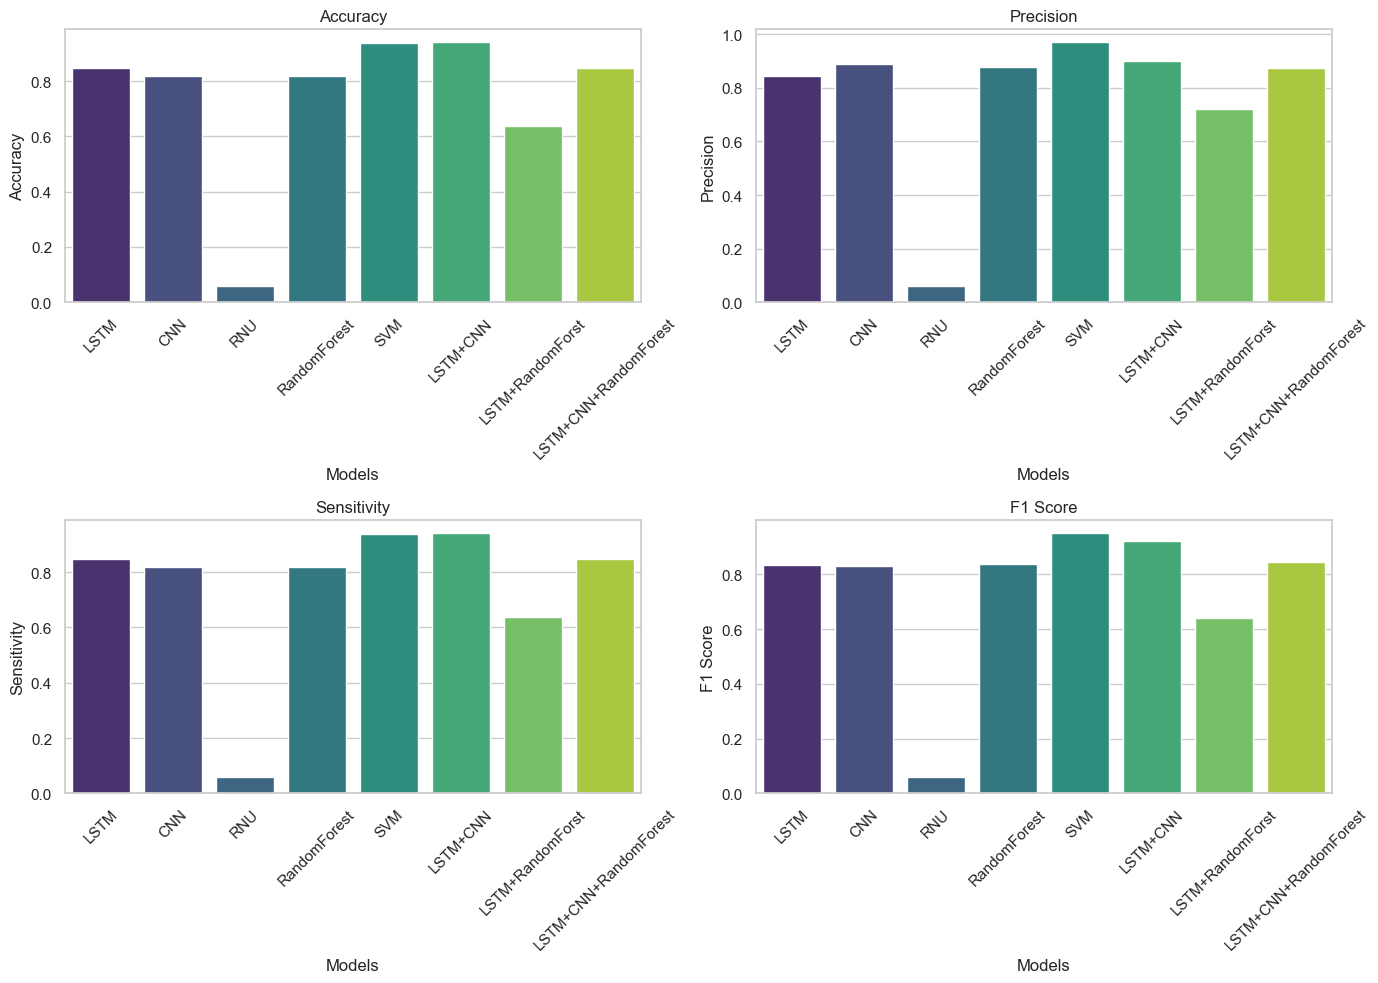

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data)

# Configuration des graphiques
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogramme de la précision
sns.barplot(x='Models', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Histogramme de la précision
sns.barplot(x='Models', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

# Histogramme de la sensibilité
sns.barplot(x='Models', y='Sensitivity', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Sensitivity')
axes[1, 0].tick_params(axis='x', rotation=45)

# Histogramme du score F1
sns.barplot(x='Models', y='F1 Score', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('F1 Score')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustement du layout
plt.tight_layout()
plt.show()


C:\Users\Nessrine\AppData\Local\Temp\ipykernel_17528\156367972.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\Nessrine\AppData\Local\Temp\ipykernel_17528\156367972.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Nessrine\AppData\Local\Temp\ipykernel_17528\156367972.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Sensitivity', data=df, ax=axes[1, 0], palette

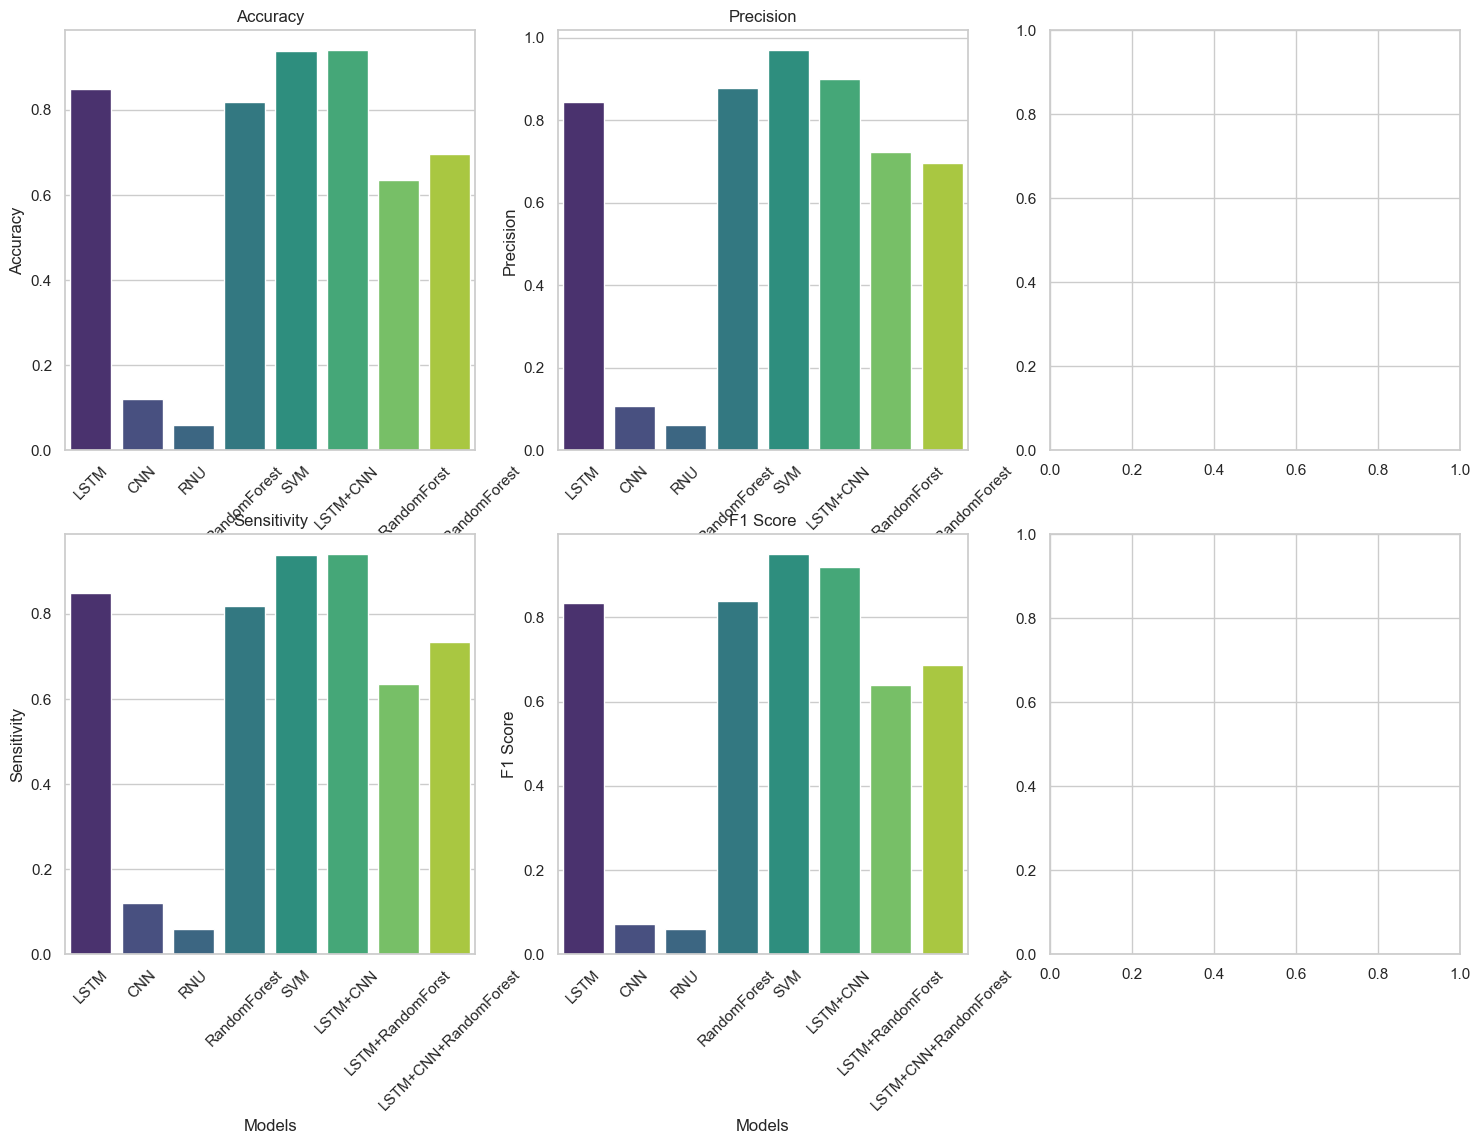

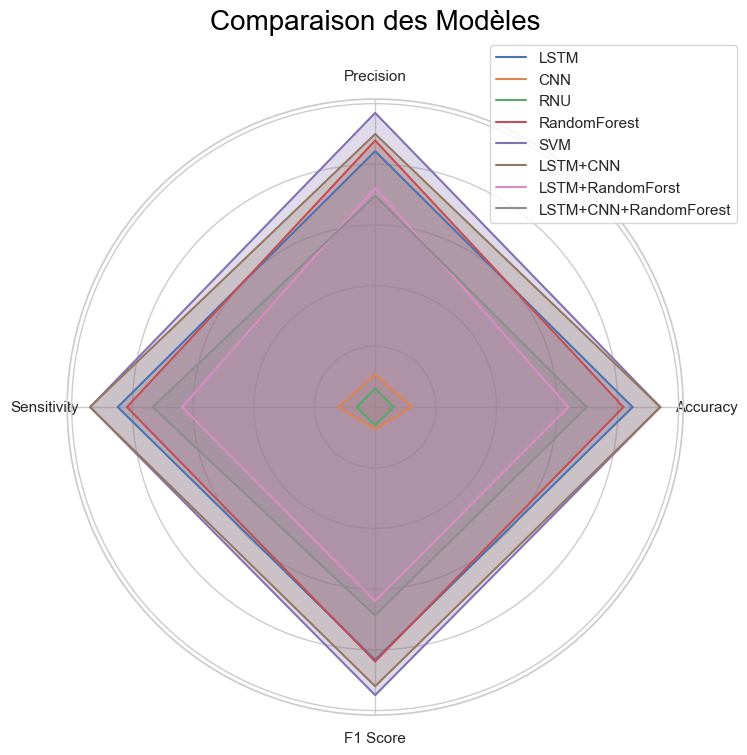

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data)

# Configuration des graphiques
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogramme de la précision
sns.barplot(x='Models', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Histogramme de la précision
sns.barplot(x='Models', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

# Histogramme de la sensibilité
sns.barplot(x='Models', y='Sensitivity', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Sensitivity')
axes[1, 0].tick_params(axis='x', rotation=45)

# Histogramme du score F1
sns.barplot(x='Models', y='F1 Score', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('F1 Score')
axes[1, 1].tick_params(axis='x', rotation=45)

# Graphique en radar
def radar_chart(data, metrics, model_names):
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    plt.title('Comparaison des Modèles', size=20, color='black', y=1.1)

    for i, model in enumerate(model_names):
        values = data.loc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, label=model)
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

metrics = ['Accuracy', 'Precision', 'Sensitivity', 'F1 Score']
radar_chart(df[metrics], metrics, df['Models'])

# Ajustement du layout
plt.tight_layout()
plt.show()


C:\Users\Nessrine\AppData\Local\Temp\ipykernel_17528\4235925581.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Score', data=df_melted, palette='viridis')


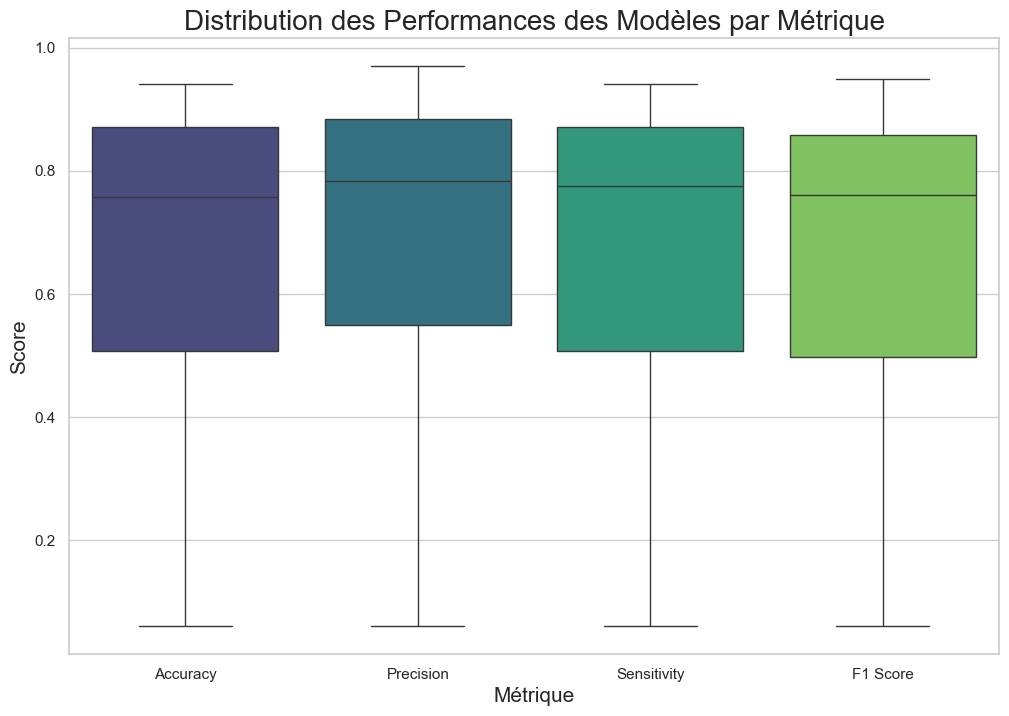

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data)

# Transformer les données pour le graphique en boîte
df_melted = df.melt(id_vars='Models', var_name='Metric', value_name='Score')

# Configuration des graphiques
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Création du graphique en boîte
sns.boxplot(x='Metric', y='Score', data=df_melted, palette='viridis')

# Personnalisation des graphiques
plt.title('Distribution des Performances des Modèles par Métrique', size=20)
plt.xlabel('Métrique', size=15)
plt.ylabel('Score', size=15)

plt.show()


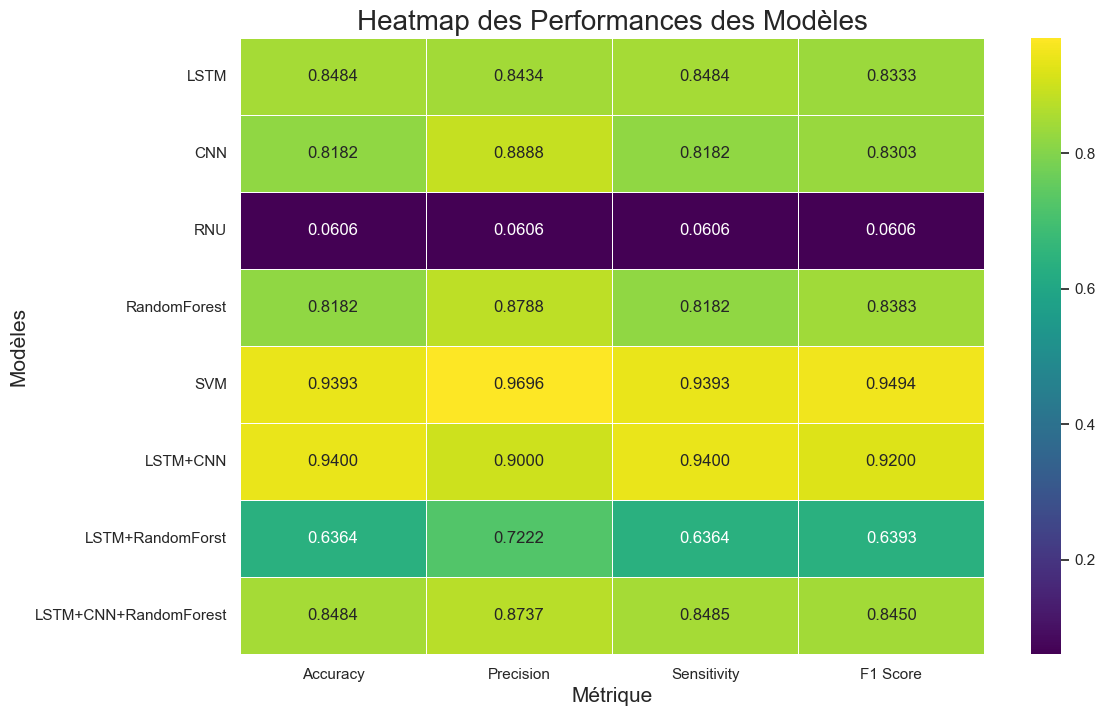

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data).set_index('Models')

# Configuration des graphiques
plt.figure(figsize=(12, 8))

# Création de la heatmap
sns.heatmap(df, annot=True, cmap='viridis', linewidths=.5, fmt='.4f')

# Personnalisation des graphiques
plt.title('Heatmap des Performances des Modèles', size=20)
plt.xlabel('Métrique', size=15)
plt.ylabel('Modèles', size=15)

plt.show()


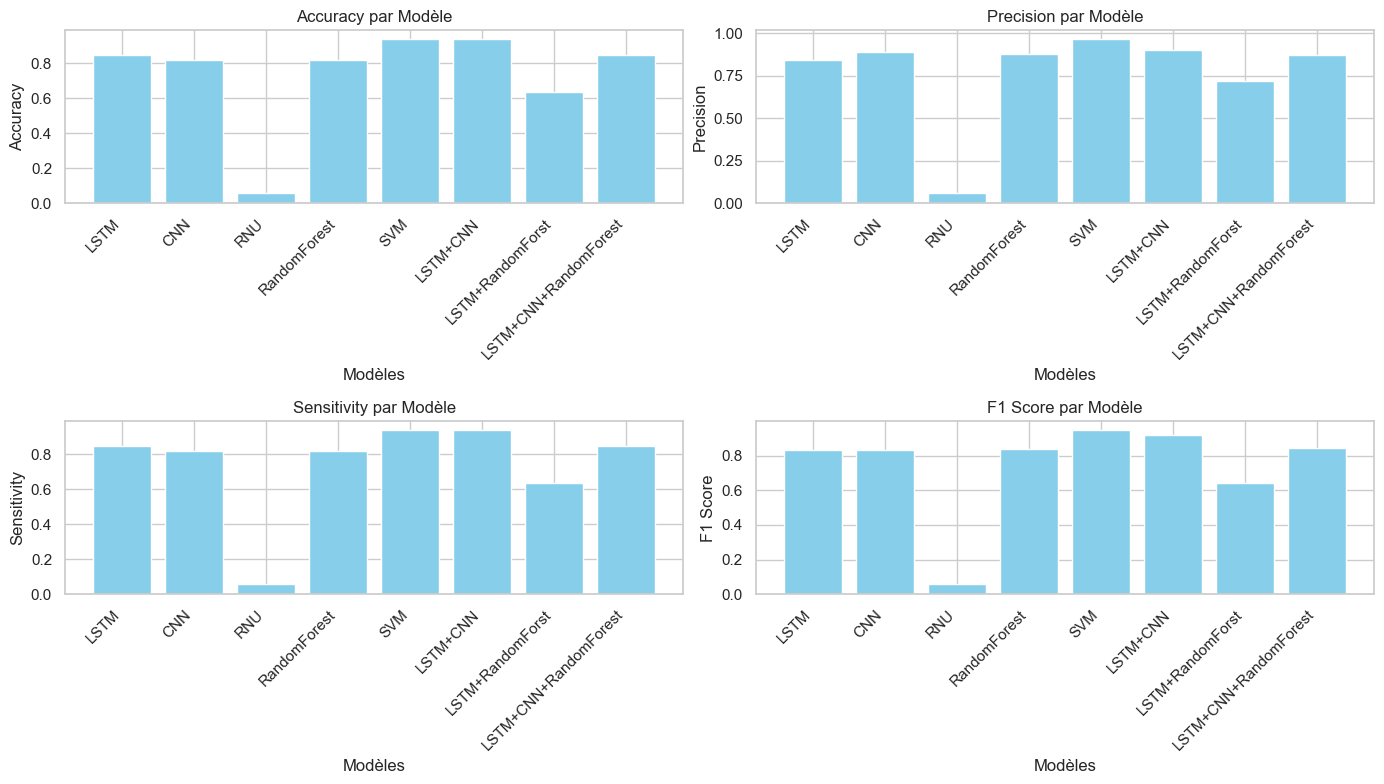

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data)

# Configuration des graphiques
plt.figure(figsize=(14, 8))

# Créer des sous-graphiques pour chaque métrique
metrics = ['Accuracy', 'Precision', 'Sensitivity', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(df['Models'], df[metric], color='skyblue')
    plt.title(f'{metric} par Modèle')
    plt.xlabel('Modèles')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


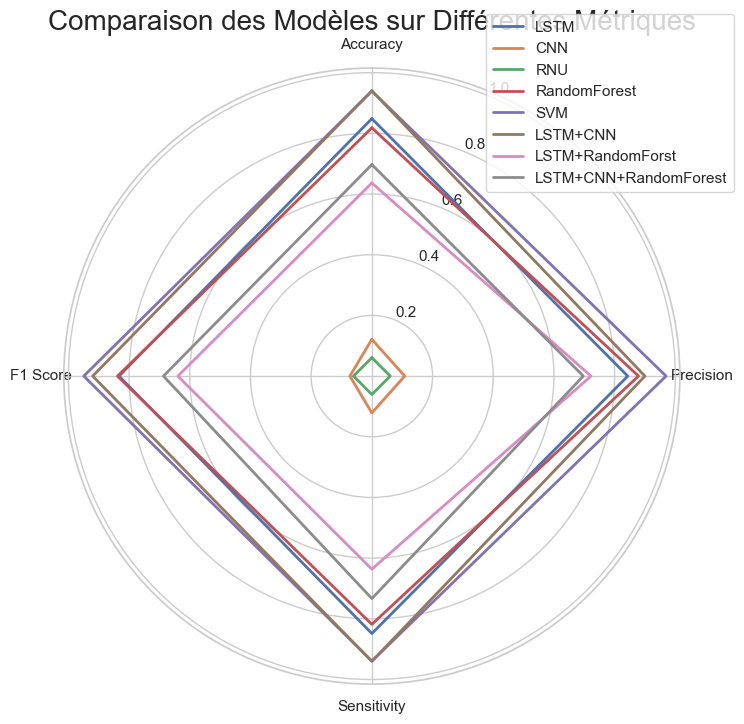

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Données du tableau
labels = np.array(['Accuracy', 'Precision', 'Sensitivity', 'F1 Score'])
num_vars = len(labels)

# Les données pour chaque modèle
model_data = {
    'LSTM': [0.8484, 0.8434, 0.8484, 0.8333],
    'CNN': [0.1212, 0.1083, 0.1212, 0.07246],
    'RNU': [0.0606, 0.06060, 0.06060, 0.06060],
    'RandomForest': [0.8182, 0.87878, 0.81818, 0.8383],
    'SVM': [0.9393, 0.9696, 0.9393, 0.9494],
    'LSTM+CNN': [0.94, 0.90, 0.94, 0.92],
    'LSTM+RandomForst': [0.63636, 0.7222, 0.63636, 0.6393],
    'LSTM+CNN+RandomForest': [0.6970, 0.6969, 0.7333, 0.6868]
}

# Préparation pour le graphique en radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Ajouter les labels
plt.xticks(angles[:-1], labels)

# Tracer les données pour chaque modèle
for model, values in model_data.items():
    values += values[:1]
    ax.plot(angles, values, label=model, linewidth=2, linestyle='solid')

# Ajouter la légende
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title('Comparaison des Modèles sur Différentes Métriques', size=20)
plt.show()


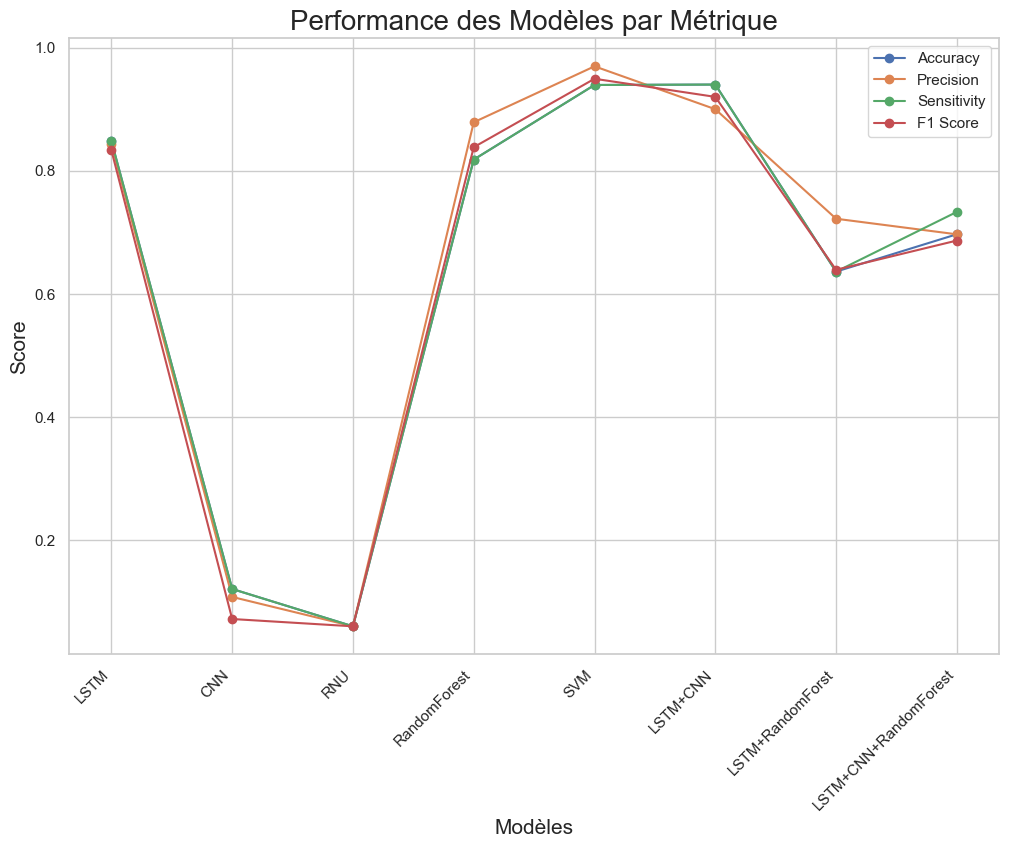

In [20]:
import matplotlib.pyplot as plt

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data).set_index('Models')

# Configuration des graphiques
plt.figure(figsize=(12, 8))

# Tracer les graphiques de lignes pour chaque métrique
for metric in df.columns:
    plt.plot(df.index, df[metric], marker='o', label=metric)

plt.title('Performance des Modèles par Métrique', size=20)
plt.xlabel('Modèles', size=15)
plt.ylabel('Score', size=15)
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` varia

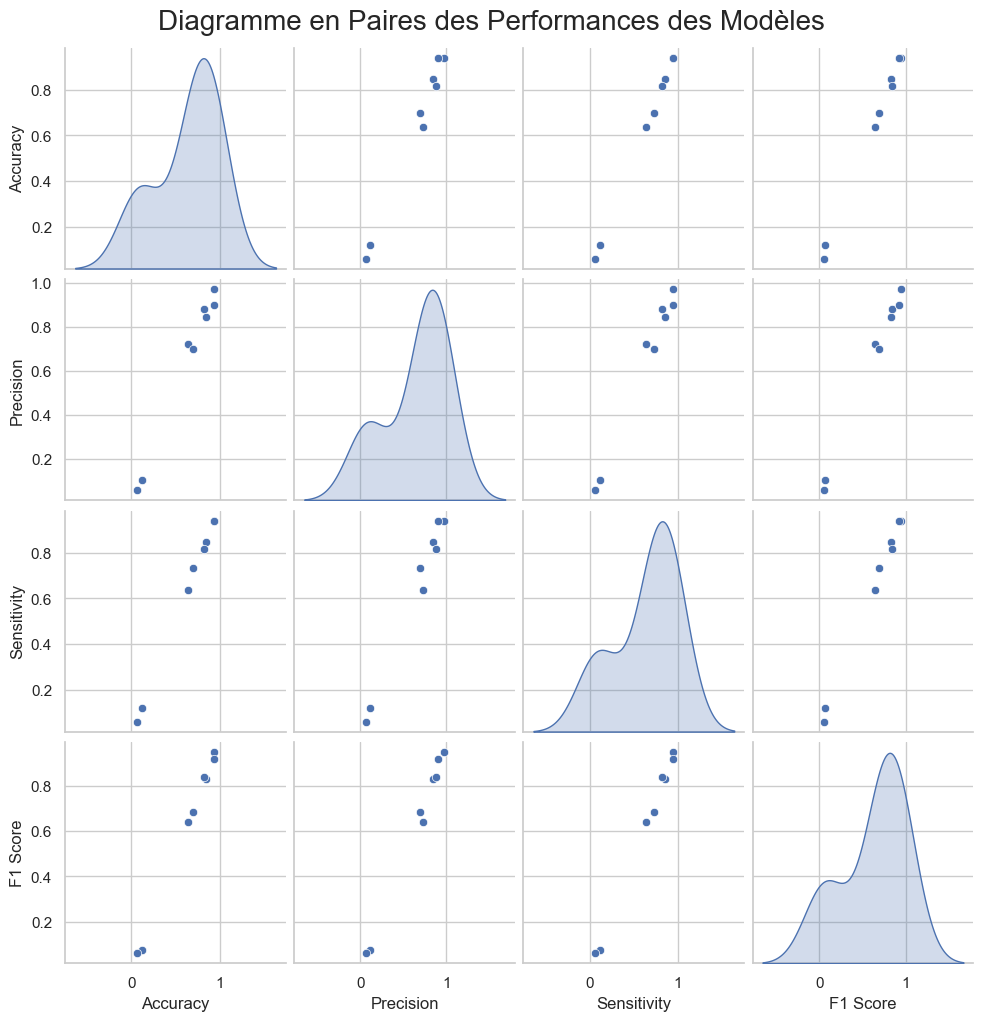

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Données du tableau
data = {
    'Models': ['LSTM', 'CNN', 'RNU', 'RandomForest', 'SVM', 'LSTM+CNN', 'LSTM+RandomForst', 'LSTM+CNN+RandomForest'],
    'Accuracy': [0.8484, 0.81818181, 0.0606, 0.8182, 0.9393, 0.94, 0.63636, 0.8484],
    'Precision': [0.8434, 0.8888, 0.0606, 0.87878, 0.9696, 0.90, 0.7222, 0.8737],
    'Sensitivity': [0.8484, 0.81818, 0.0606, 0.81818, 0.9393, 0.94, 0.63636, 0.84848],
    'F1 Score': [0.8333, 0.83030, 0.06060, 0.8383, 0.9494, 0.92, 0.6393, 0.8450 ]
}

df = pd.DataFrame(data)

# Créer un diagramme en paires
sns.pairplot(df.drop(columns='Models'), diag_kind='kde', palette='viridis')

plt.suptitle('Diagramme en Paires des Performances des Modèles', size=20, y=1.02)
plt.show()
